# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


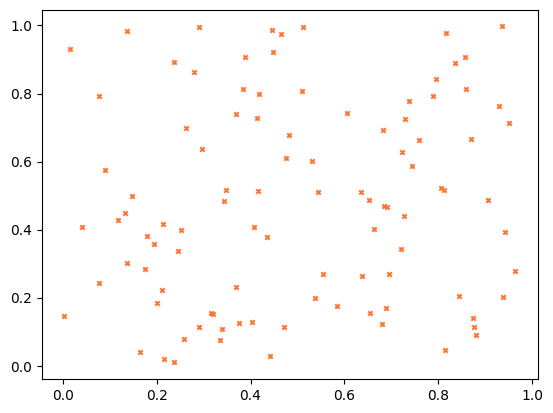

In [1]:
import matplotlib.pyplot as plt
import numpy as np

cnt = 100
x = np.random.random(cnt)
y = np.random.random(cnt)

plt.scatter(x, y, color='#ff7431', marker='x', s=10)


2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imagesc` a `contour`.


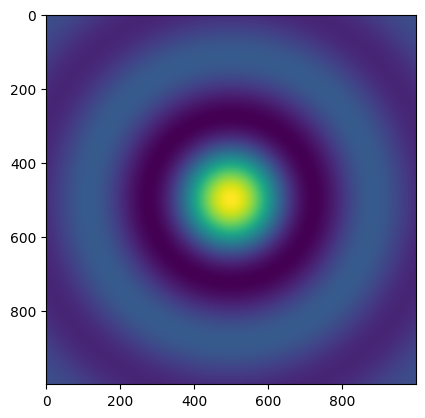

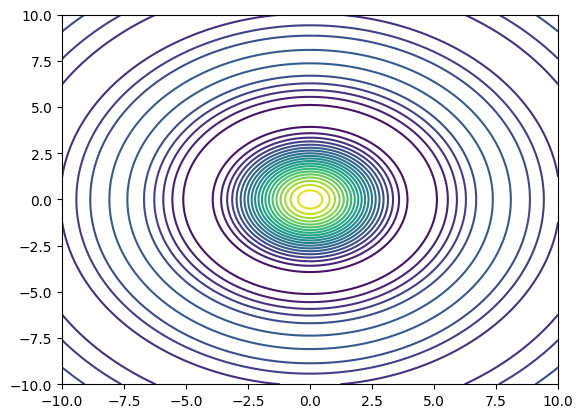

In [2]:
x, y = np.meshgrid(np.linspace(-10, 10, 1000), np.linspace(-10, 10, 1000))
z = np.sin(np.sqrt(x**2 + y**2))/np.sqrt(x**2 + y**2)

plt.imshow(z)
plt.figure()
plt.contour(x, y, z, 20)


3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


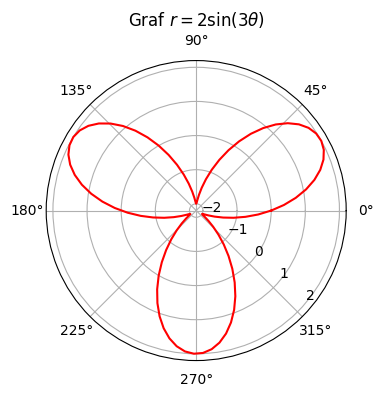

In [3]:
t = np.linspace(0, 2 * np.pi, 100)
r = 2 * np.sin(3 * t)

fig = plt.figure(figsize=(3,3))
ax = fig.add_axes([0, 0, 1, 1], polar=True)
ax.set_title(r"Graf $r = 2\sin(3\theta)$")
ax.set_rticks([-2, -1, 0, 1, 2])
ax.set_rlabel_position(-40)
ax.plot(t, r, color='red')
plt.show()


4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


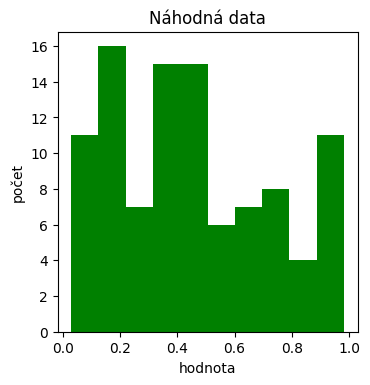

In [4]:
data = np.random.random(100)
fig = plt.figure(figsize=(3,3))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Náhodná data")
ax.set_xlabel("hodnota")
ax.set_ylabel("počet")
ax.hist(data, color="green")
plt.show()


5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


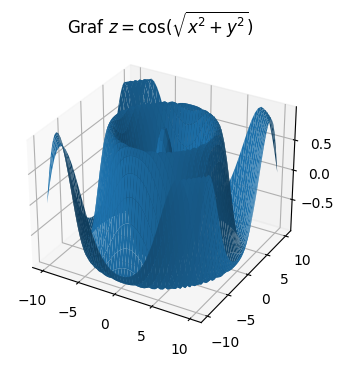

In [5]:
min = -10
max = 10
fidelity = 50
x, y = np.meshgrid(np.linspace(min, max, fidelity), np.linspace(min, max, fidelity))
z = np.cos(np.sqrt(np.power(x, 2) + np.power(y, 2)))

fig = plt.figure(figsize=(3,3))
ax = fig.add_axes([0, 0, 1, 1], projection="3d")
ax.set_title(r"Graf $z = \cos(\sqrt{x^2+y^2})$")
ax.plot_surface(x, y, z)
plt.show()

# Domácí úkol
- Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral` a vykreslete spirálu a její sinus pomocí `imshow` a `contour`.
- měřte časy výpočtu pro různé hodnoty mezi 11 a 1001 a porovnejte je.
- vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů do jednoho grafu.
- nastavte popisky, legendu a osy
- co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 

In [6]:
import time
import matplotlib.font_manager as mpl_font
import matplotlib.ticker as mpl_tick

# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj

def integer_spiral_numpy(n):
    A = np.zeros((n+1, n+1)) #needs +1 else it doesn't write last column, kinda stupid but it works
    
    if n > 0:
        mid = n//2 + 1
        A[mid, mid] = 1
        for i in range(1, mid):
            nums = ((2*i - 1)**2 + 1, (2*i - 1)**2 + 2*i, (2*i)**2 + 1)
            A[mid-i, mid+i-1:mid-i:-1] = np.arange(nums[0], nums[1])
            A[mid-i:mid+i:1, mid-i] = np.arange(nums[1], nums[2])
            if i*2 < n:
                nums = ((2*i)**2 + 1, (2*i)**2 + 2*i + 1, (2*i + 1)**2 + 1)
                A[mid+i, mid-i:mid+i:1] = np.arange(nums[0], nums[1])
                A[mid+i:mid-i-1:-1, mid+i] = np.arange(nums[1], nums[2])
    return A[1:, 1:]

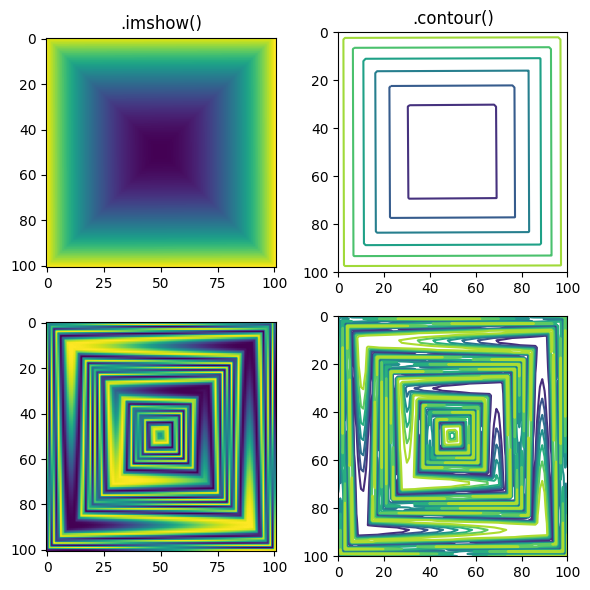

In [7]:
spiral = integer_spiral_numpy(101)
sin_spiral = np.sin(spiral*0.04)

fig, ax = plt.subplots(2, 2, figsize=(6,6))

ax[0][0].imshow(spiral)
ax[0][0].set_title(".imshow()")

ax[0][1].contour(spiral)
ax[0][1].set_title(".contour()")
ax[0][1].invert_yaxis()

ax[1][0].imshow(sin_spiral)

ax[1][1].contour(sin_spiral)
ax[1][1].invert_yaxis()

fig.tight_layout()
plt.show()

Calculating value 1/10 (11)
Calculating value 2/10 (18)
Calculating value 3/10 (29)
Calculating value 4/10 (49)
Calculating value 5/10 (81)
Calculating value 6/10 (134)
Calculating value 7/10 (222)
Calculating value 8/10 (367)
Calculating value 9/10 (606)
Calculating value 10/10 (1001)


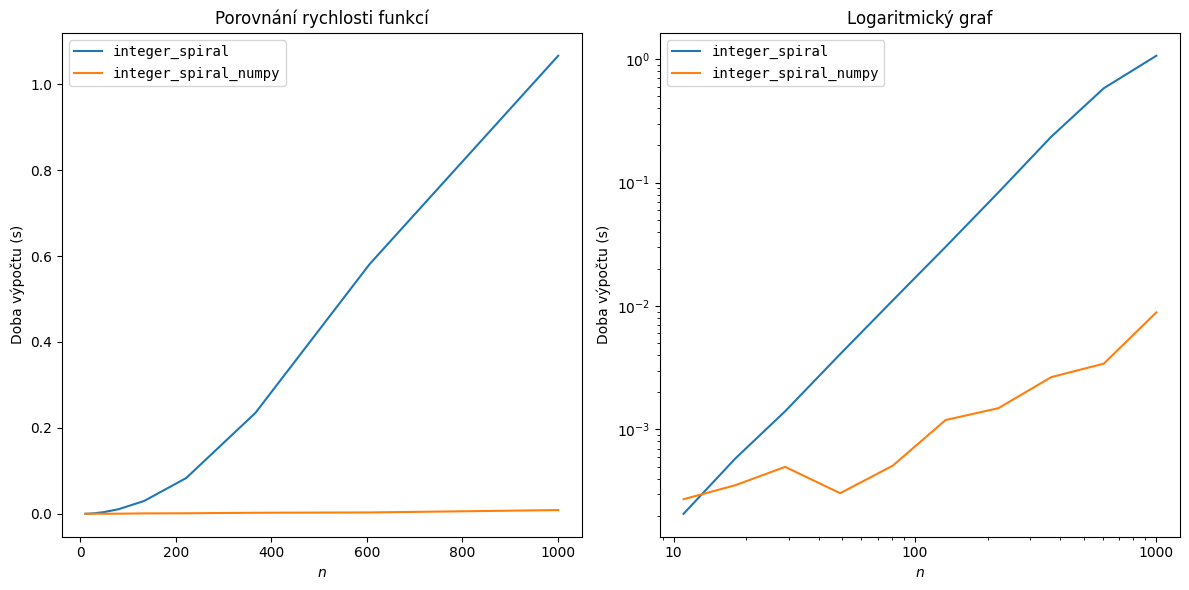

In [8]:
n = 10
rep = 5 #attempt to smooth out inconsistencies
timedata = np.zeros((3, n))
timedata[0] = np.int_(np.geomspace(start=11, stop=1001, num=n))

for i in range(n):
    value = np.int_(timedata[0][i])
    print(f"Calculating value {i+1}/{n} ({value})") #show progress

    start = time.time()
    for r in range(rep):
        integer_spiral(value)
    end = time.time()
    timedata[1][i] = (end - start) / rep

    start = time.time()
    for r in range(rep):
        integer_spiral_numpy(value)
    end = time.time()
    timedata[2][i] = (end - start) / rep

fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(timedata[0], timedata[1], label="integer_spiral")
ax[0].plot(timedata[0], timedata[2], label="integer_spiral_numpy")
ax[0].set_title("Porovnání rychlosti funkcí")
ax[0].set_xlabel("$n$")
ax[0].set_ylabel("Doba výpočtu (s)")
ax[0].legend(loc=2, prop=mpl_font.FontProperties(family="monospace"))

ax[1].loglog(timedata[0], timedata[1], label="integer_spiral")
ax[1].loglog(timedata[0], timedata[2], label="integer_spiral_numpy")
ax[1].xaxis.set_major_formatter(mpl_tick.ScalarFormatter())
ax[1].set_title("Logaritmický graf")
ax[1].set_xlabel("$n$")
ax[1].set_ylabel("Doba výpočtu (s)")
ax[1].legend(loc=2, prop=mpl_font.FontProperties(family="monospace"))

fig.tight_layout()
plt.show()


# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.

Koeficienty aproximace linearní funkcí:
původní funkce:	1.94052
numpy funkce:	0.73837


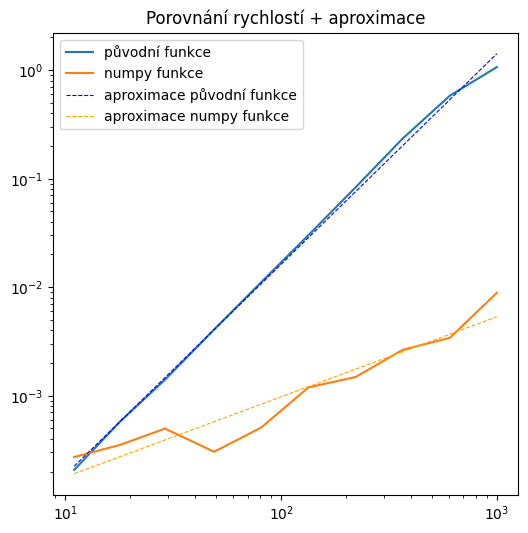

In [9]:
L = np.log10(timedata)
aprox1 = np.polyfit(L[0], L[1], deg=1)
aprox2 = np.polyfit(L[0], L[2], deg=1)
print(f"Koeficienty aproximace linearní funkcí:\npůvodní funkce:\t{aprox1[0]:>3.5f}\nnumpy funkce:\t{aprox2[0]:>3.5f}")

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Porovnání rychlostí + aproximace")
ax.loglog(timedata[0], timedata[1], label="původní funkce")
ax.loglog(timedata[0], timedata[2], label="numpy funkce")
ax.loglog(timedata[0], 10**(L[0]*aprox1[0] + aprox1[1]), "--", c="blue", lw=.8, label="aproximace původní funkce")
ax.loglog(timedata[0], 10**(L[0]*aprox2[0] + aprox2[1]), "--", c="orange", lw=.8, label="aproximace numpy funkce")
ax.legend()
plt.show()